In [12]:
import tensorflow as tf
from keras.models import Sequential 
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255


In [3]:
import keras
model = Sequential();
model.add(keras.layers.Flatten(input_shape=(28,28)))  #multidim to single dim array
model.add(keras.layers.Dense(128,activation='relu'))  # 128 neuron
# relu :It returns 0 for any negative input and returns the input value for any positive input.
model.add(keras.layers.Dense(10,activation='softmax'))


In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"]);
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2)


Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6719 - accuracy: 0.8298 - val_loss: 0.3614 - val_accuracy: 0.9028
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.9036 - val_loss: 0.2933 - val_accuracy: 0.9197


In [6]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("loss=",test_loss)
print("acc=",test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.2933 - accuracy: 0.9197
loss= 0.2932581603527069
acc= 0.919700026512146


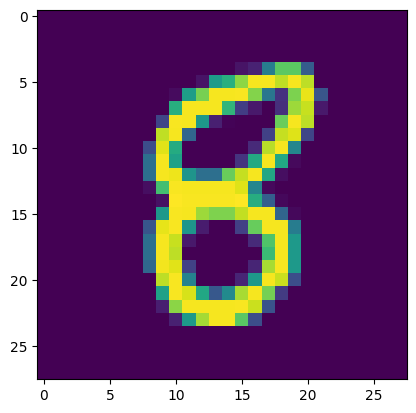

313/313 [==============================] - 0s 1ms/step
the number in image is= 8


In [9]:
import random
n=random.randint(0,9999);
plt.imshow(x_test[n])
plt.show()
pred = model.predict(x_test)
print("the number in image is=",np.argmax(pred[n]))


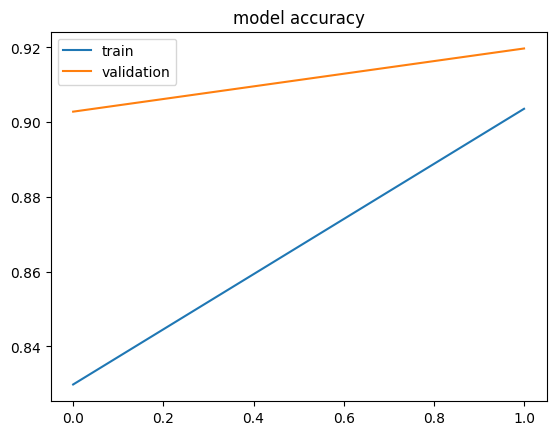

In [10]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title("model accuracy")
plt.legend(["train","validation"])
plt.show()


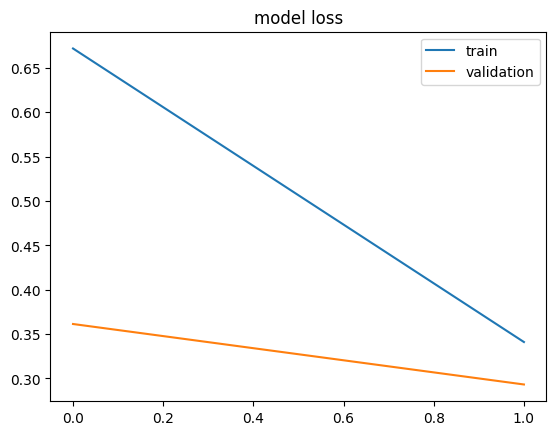

In [11]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("model loss")
plt.legend(["train","validation"])
plt.show()
